In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import spikeinterface.full as si
import numpy as np
import psutil
from spikeinterface.toolkit import get_noise_levels
import pylab as plt

filename = 'recordings_Neuronexus-32_static.h5'
job_kwargs = {'n_jobs': -1, 'progress_bar' :True, 'chunk_duration' : '100ms'}

In [3]:
from spikeinterface.sortingcomponents.benchmark import benchmark_matching
from spikeinterface.sortingcomponents.matching import matching_methods

In [36]:
benchmarks = {}

a = benchmark_matching.BenchmarkMatching(filename, 'naive', job_kwargs=job_kwargs)
noise_levels = get_noise_levels(a.recording_f)
method_kwargs = {'noise_levels' : noise_levels}

for method in matching_methods.keys():
    benchmarks[method] = benchmark_matching.BenchmarkMatching(filename, method, method_kwargs, job_kwargs=job_kwargs)
    benchmarks[method].run()

find spikes (circus-omp): 100%|██████████████████████████████████████████████████| 6000/6000 [00:56<00:00, 105.36it/s]


/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:139: RuntimeWarning: invalid value encountered in true_divide
  recall_scores.append(recall2)
/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:146: RuntimeWarning: invalid value encountered in true_divide
  
/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:139: RuntimeWarning: invalid value encountered in true_divide
  recall_scores.append(recall2)
/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:146: RuntimeWarning: invalid value encountered in true_divide
  
/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:139: RuntimeWarning: invalid value encountered in true_divide
  recall_scores.append(recall2)
/home/pierre/github/spikeinterface/spikeinterface/comparison/collisioncomparison.py:146: RuntimeWarning: invalid value encountered in true_divide
  
/home/pierre/github

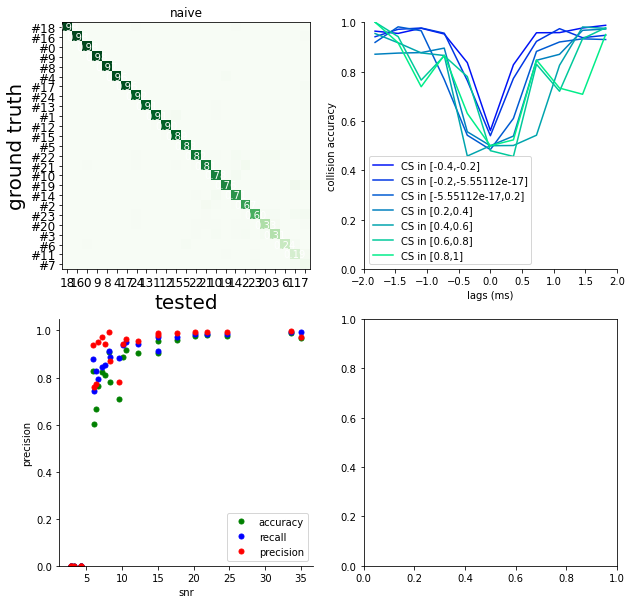

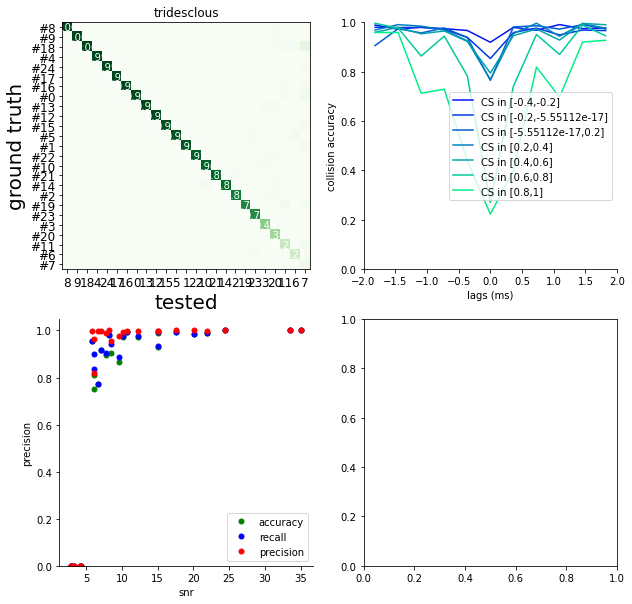

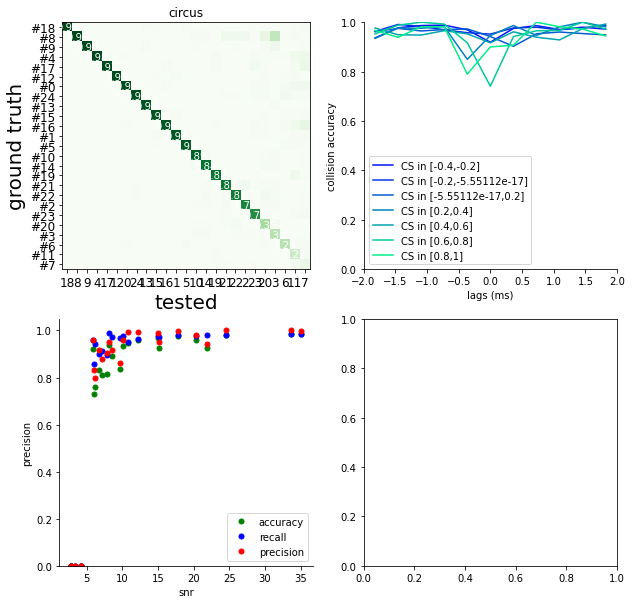

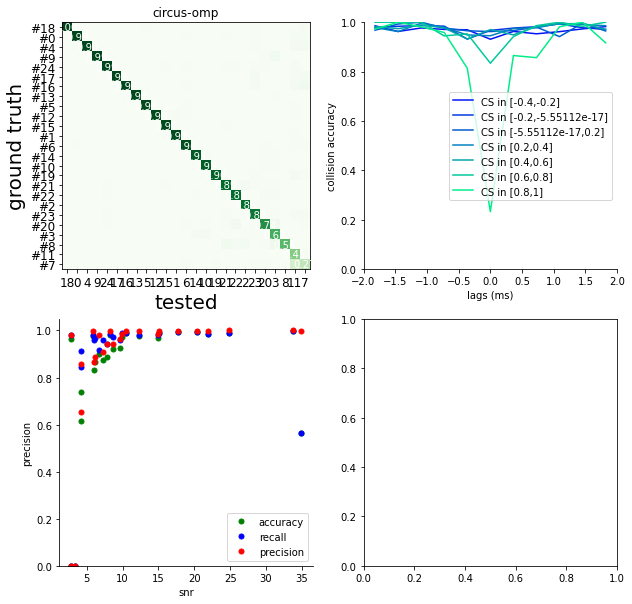

In [56]:
for method in matching_methods.keys():
    benchmarks[method].plot()

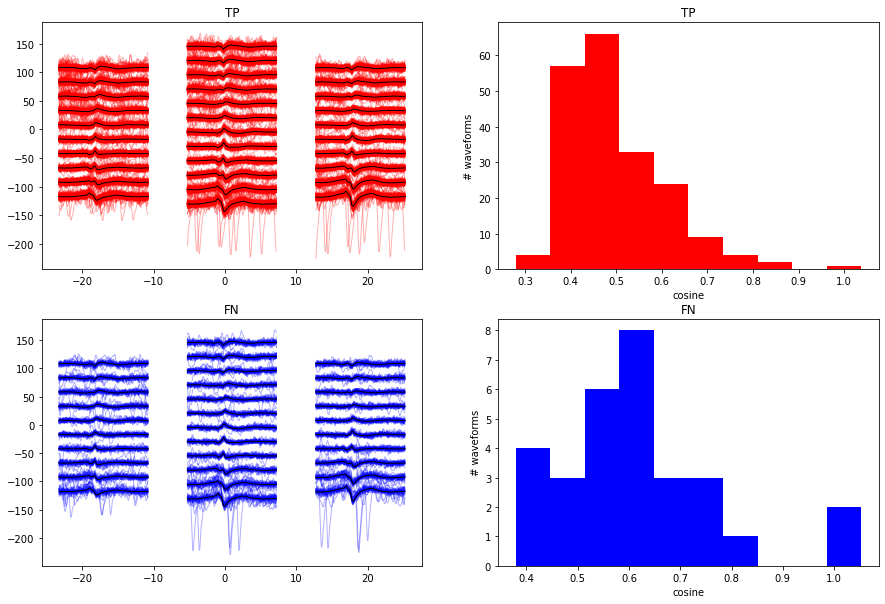

In [38]:
benchmark_matching.plot_errors_matching(benchmarks['circus'], '#2')

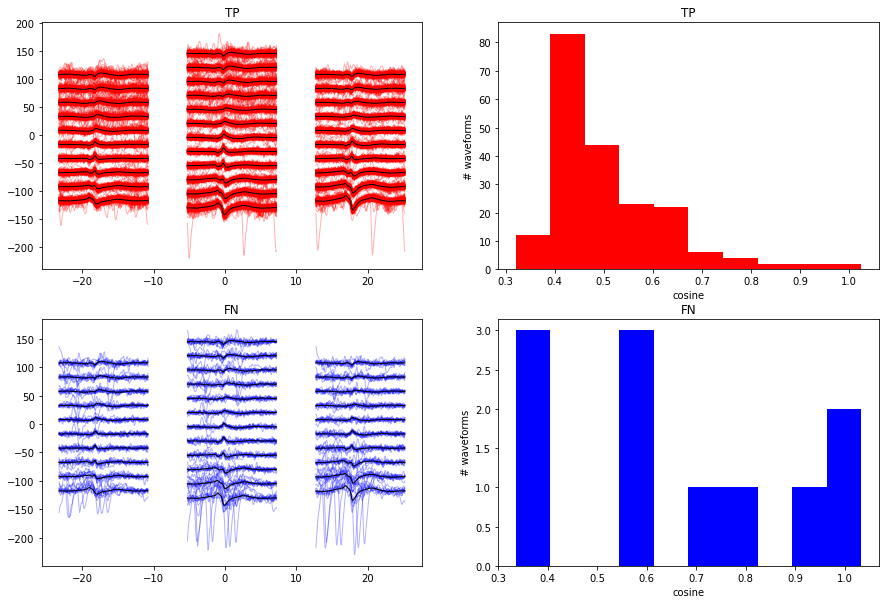

In [39]:
benchmark_matching.plot_errors_matching(benchmarks['circus-omp'], '#2')

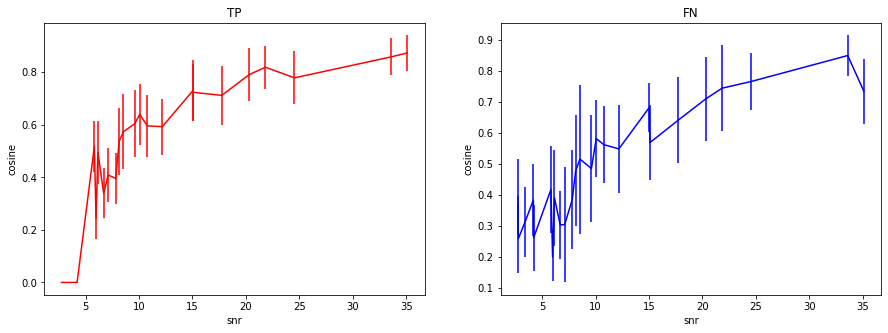

In [40]:
benchmark_matching.plot_errors_matching_all_neurons(benchmarks['circus'], metric='cosine')

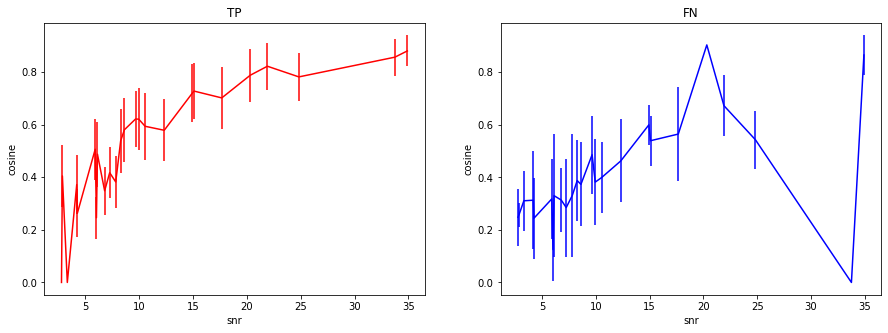

In [41]:
benchmark_matching.plot_errors_matching_all_neurons(benchmarks['circus-omp'], metric='cosine')

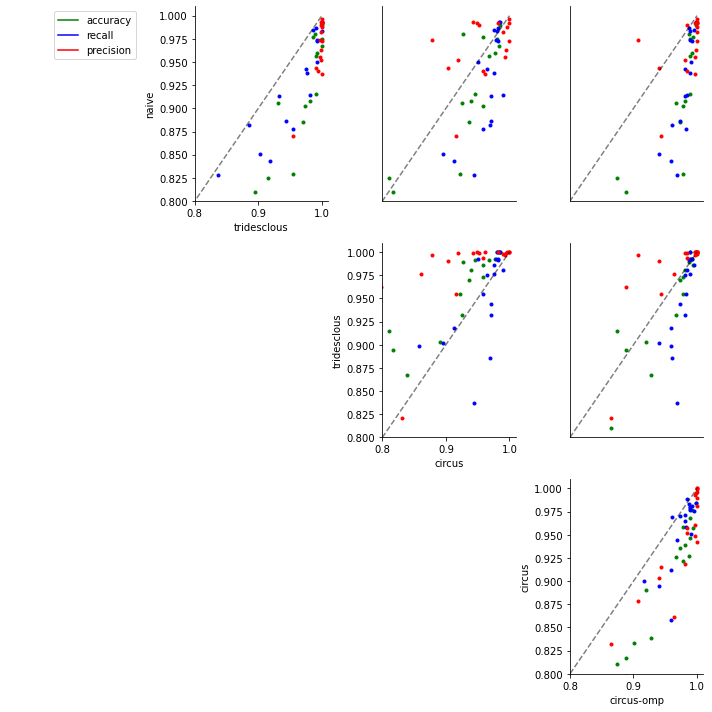

In [59]:
all_benchmarks = [i for i in benchmarks.values()]
benchmark_matching.plot_comparison_matching(all_benchmarks, ylim=(0.8, 1.01))